### Importing libraries

In [1]:
# dealing with dataframes and arrays
import pandas as pd
import numpy as np
# for date time operations
from datetime import date
import datetime
# visualisations libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import missingno as mn
from yellowbrick.cluster import KElbowVisualizer
# for preprocessing and machine learning tasks
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
# metrics 
from sklearn.metrics import roc_auc_score, classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
# shap for shap analysis
import shap
import warnings 
warnings.filterwarnings('ignore')

### Data set reading and data description

In [2]:
df = pd.read_csv("E:\marketing_campaign.csv",sep='\t')

In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

#### Data descriptions

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Missing Values

In [7]:
print(f"{df.isnull().mean().sort_values(ascending=False) * 100}")

Income                 1.071429
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64


So we only have to deal with missing values in the income feature of the dataset

In [8]:
color = ['#EAEAEA','#FF2E63','#252A34','#08D9D6','black']

<AxesSubplot:>

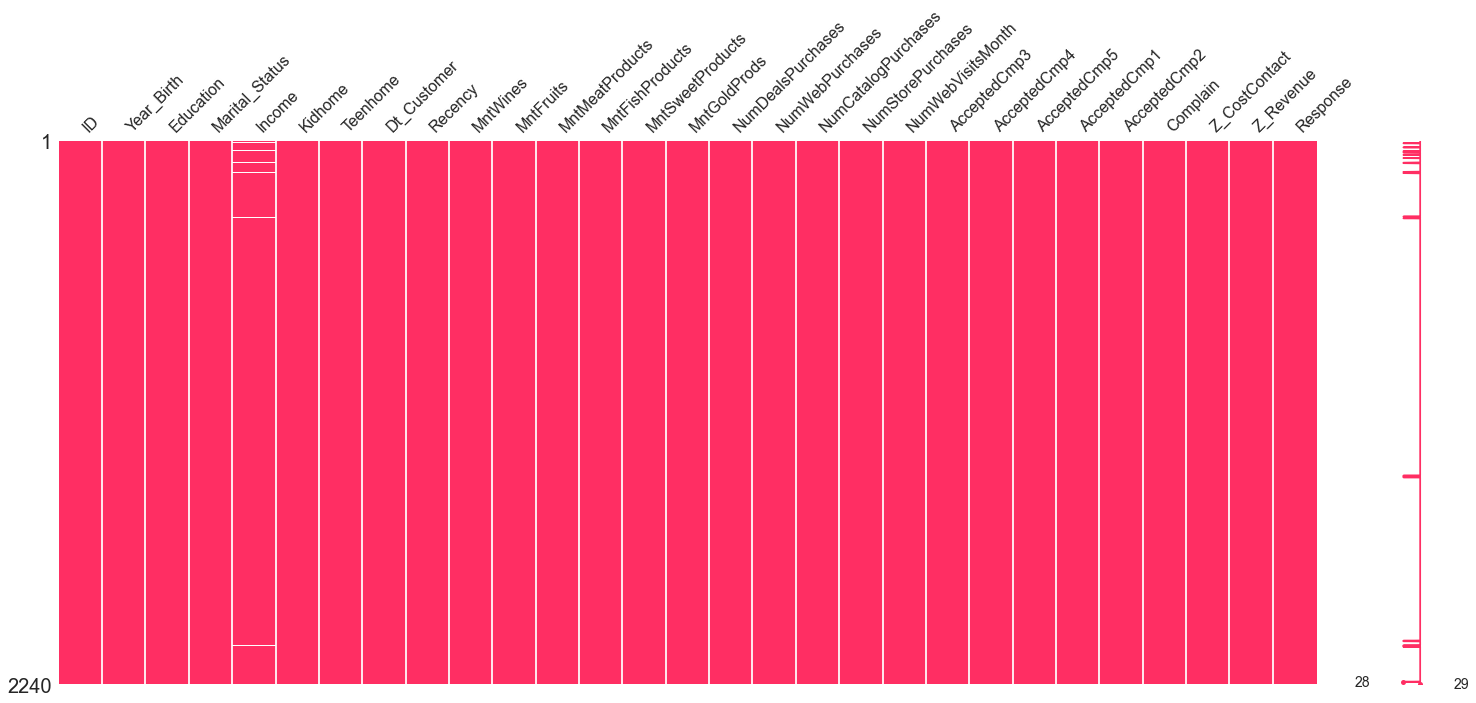

In [9]:
mn.matrix(df,color=(matplotlib.colors.to_rgb(color[1])))

In [10]:
df['Income'] = df.Income.fillna(df.Income.median())

We use median for imputation because it is insensitive to the outliers

#### Feautre Engineering

In [11]:
# first of all lets remove the response so as to not make it confusing for latter on as we are 
# adding multiple new features
response = df.Response
df.drop("Response",axis=1,inplace=True)

In [12]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
# Since 2n cycle is pretty much similar to the masters we will replace it with masters
df.Education = df.Education.str.replace("2n Cycle","Master")

In [14]:
df.Education.value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [15]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Making our life easier by making this feature binomial in nature would also help the algorithm to learn better.

In [16]:
# Renaming categories
df['Marital_Status'] = df['Marital_Status'].str.replace('Married', 'Not Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Together', 'Not Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Single')

In [17]:
df.Marital_Status.value_counts()

Not Single    1444
Single         796
Name: Marital_Status, dtype: int64

In [18]:
df['Children'] = df.Kidhome + df.Teenhome

In [19]:
df['Expenses'] = df.MntFruits + df.MntFishProducts + df.MntMeatProducts + \
df.MntGoldProds + df.MntSweetProducts + df.MntWines 

In [20]:
date_enrolled = pd.to_datetime(df.Dt_Customer)
todays_date = pd.to_datetime(date.today())
number_of_days_with_company = todays_date - date_enrolled
df['Days_enrolled'] = number_of_days_with_company

In [21]:
df["Age"] = todays_date.year - df.Year_Birth

In [22]:
df['Response'] = response

In [23]:
df.Z_CostContact.unique()

array([3], dtype=int64)

In [24]:
df.Z_Revenue.unique()

array([11], dtype=int64)

In [25]:
df.drop('Z_CostContact',axis=1,inplace=True)
df.drop("Z_Revenue",axis=1,inplace=True)
# dropping because no value is added by this feature

In [26]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Children,Expenses,Days_enrolled,Age,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1617,3496 days,64,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,2650 days,67,0
2,4141,1965,Graduation,Not Single,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,2997 days,56,0
3,6182,1984,Graduation,Not Single,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,2590 days,37,0
4,5324,1981,PhD,Not Single,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,2846 days,40,0


### Data Visualisations

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Children', 'Expenses', 'Days_enrolled',
       'Age', 'Response'],
      dtype='object')

In [28]:
# Removing some variables
df = df.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'
       ])


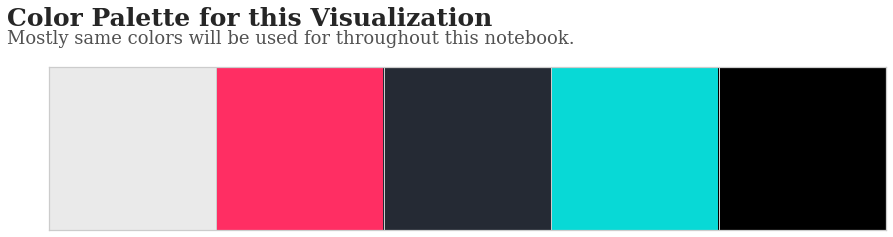

In [29]:
# color palette for visualizations
palette = sns.color_palette( palette = color)

sns.palplot(palette,size=3)
plt.text(-0.75,-0.75,'Color Palette for this Visualization', {'fontname':'serif', 'size':25, 'weight':'bold'})
plt.text(-0.75,-0.64,'Mostly same colors will be used for throughout this notebook.', {'fontname':'serif', 'size':18, 'weight':'normal'}, alpha = 0.8)
plt.show()

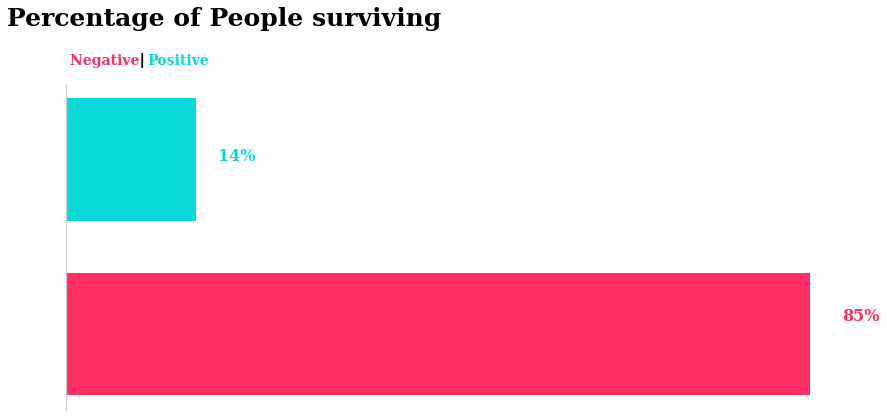

In [30]:
x = pd.DataFrame( df.groupby(['Response'])['Response'].count())

# plot
fig, ax = plt.subplots(figsize = (14,6) )
ax.barh([0], x.Response[0], height = 0.7, color = color[1])
plt.text(1990,0.08, '85%',{'fontname':'Serif','weight':'bold' ,'size':'16','color': color[1]})
ax.barh([1], x.Response[1], height = 0.7, color = color[3])
plt.text(390,1, '14%',{'fontname':'Serif', 'weight':'bold','size':'16','color':color[3]})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-150,1.77, 'Percentage of People surviving' ,{'fontname': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
plt.text(10,1.55, 'Negative ', {'fontname': 'Serif','weight':'bold','Size': '14','weight':'bold','style':'normal', 'color':color[1]})
plt.text(190,1.55, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(210,1.55, 'Positive', {'fontname': 'Serif','weight':'bold', 'Size': '14','style':'normal', 'weight':'bold','color':color[3]})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

There is imbalance in the dataset but it not that high

#### Continous Variables

In [31]:
df.Days_enrolled = list(map(lambda x:int(str(x).split()[0]),df.Days_enrolled))

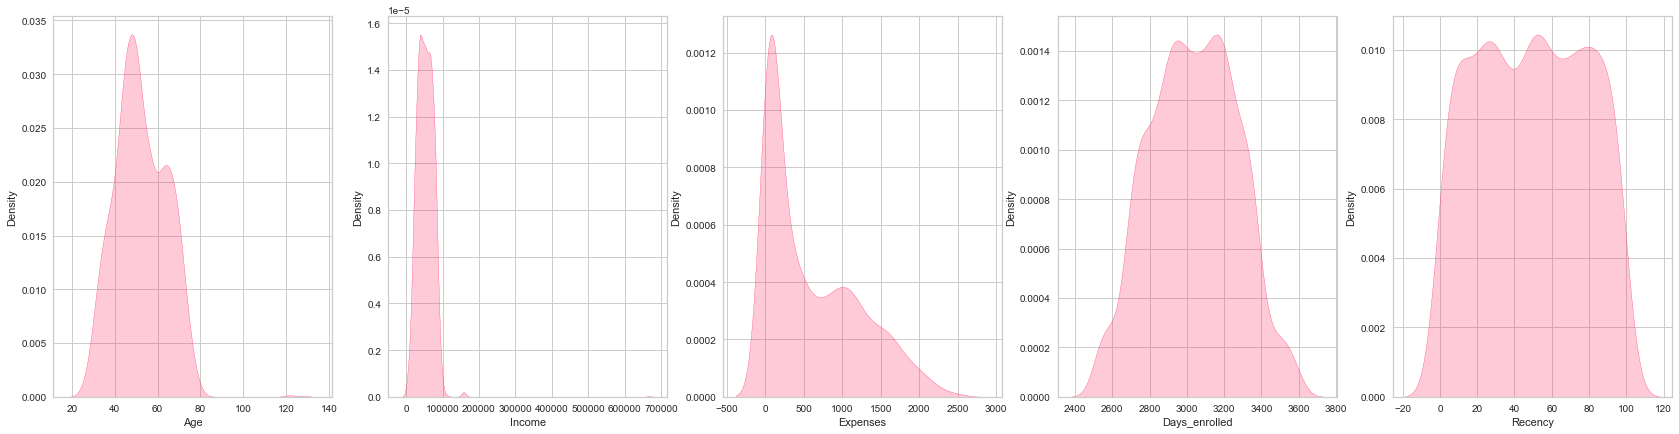

In [32]:
col = ['Age','Income','Expenses','Days_enrolled','Recency']
fig,axes = plt.subplots(1,5,figsize=(29,7))
for i in range(5):
    sns.kdeplot(df[col[i]] ,ax=axes[i],color=color[1],fill=True)

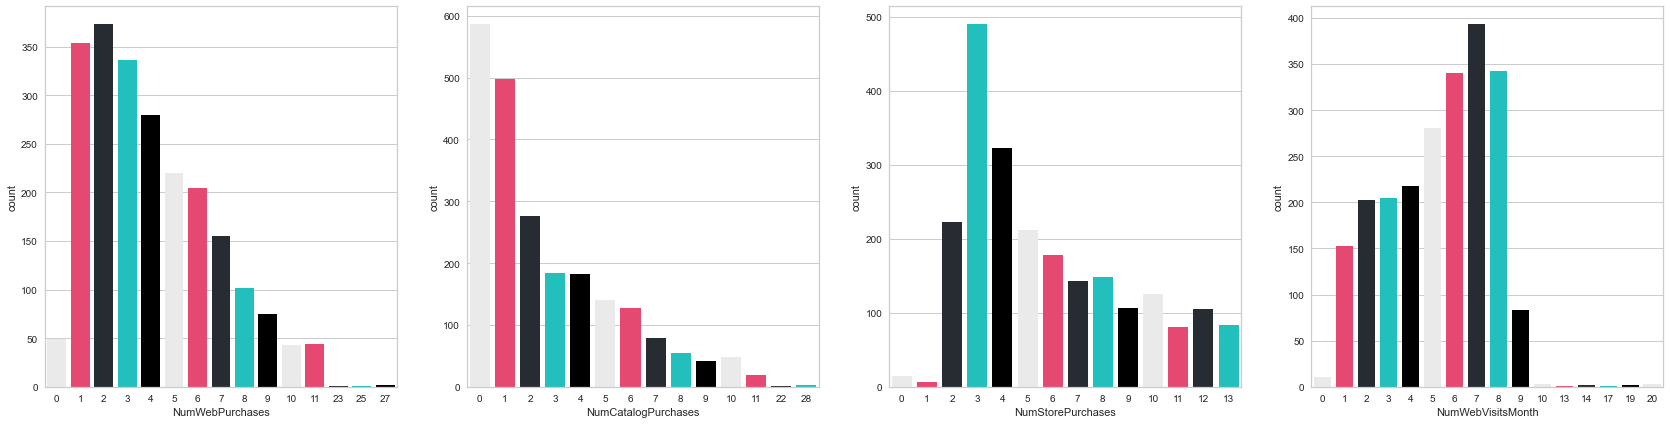

In [33]:
c = ['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
fig,axes = plt.subplots(1,4,figsize=(29,7))
for i in range(4):
    sns.countplot(df[c[i]] ,ax=axes[i],palette=palette)

<AxesSubplot:title={'center':'Distribution of Income according to Response'}, xlabel='Income', ylabel='Density'>

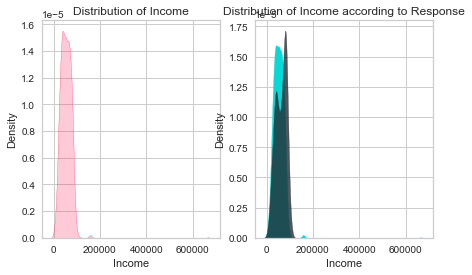

In [34]:
fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Distribution of Income")
sns.kdeplot(df.Income,ax=ax[0],color=color[1],shade=True)

ax[1].set_title("Distribution of Income according to Response")
sns.kdeplot(df[df.Response==0]['Income'],ax=ax[1],color = color[3],legend=True,shade=True,alpha=1)
sns.kdeplot(df[df.Response==1]['Income'],ax=ax[1],color = color[2],shade=True,legend=True,alpha=0.8)

<AxesSubplot:title={'center':'Distribution of Expenses according to Response'}, xlabel='Expenses', ylabel='Density'>

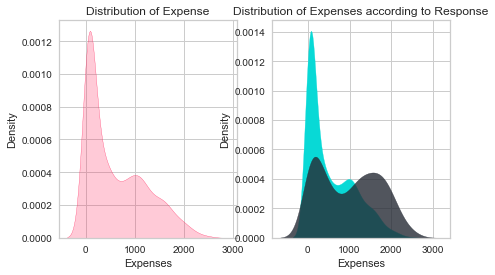

In [35]:
fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Distribution of Expense")
sns.kdeplot(df.Expenses,ax=ax[0],color=color[1],shade=True)

ax[1].set_title("Distribution of Expenses according to Response")
sns.kdeplot(df[df.Response==0]['Expenses'],ax=ax[1],color = color[3],legend=True,shade=True,alpha=1)
sns.kdeplot(df[df.Response==1]['Expenses'],ax=ax[1],color = color[2],shade=True,legend=True,alpha=0.8)

<AxesSubplot:title={'center':'Distribution of Age according to Response'}, xlabel='Age', ylabel='Density'>

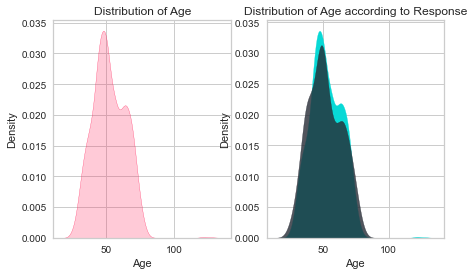

In [36]:
fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Distribution of Age")
sns.kdeplot(df.Age,ax=ax[0],color=color[1],shade=True)

ax[1].set_title("Distribution of Age according to Response")
sns.kdeplot(df[df.Response==0]['Age'],ax=ax[1],color = color[3],legend=True,shade=True,alpha=1)
sns.kdeplot(df[df.Response==1]['Age'],ax=ax[1],color = color[2],shade=True,legend=True,alpha=0.8)

<AxesSubplot:title={'center':'Distribution of Income according to Response'}, xlabel='Days_enrolled', ylabel='Density'>

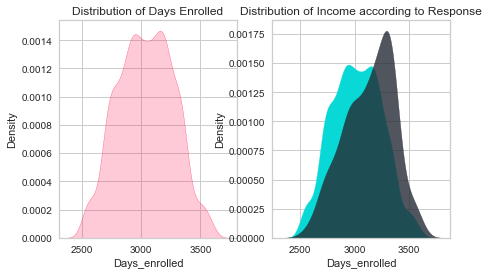

In [37]:
fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Distribution of Days Enrolled")
sns.kdeplot(df.Days_enrolled,ax=ax[0],color=color[1],shade=True)

ax[1].set_title("Distribution of Income according to Response")
sns.kdeplot(df[df.Response==0]['Days_enrolled'],ax=ax[1],color = color[3],legend=True,shade=True,alpha=1)
sns.kdeplot(df[df.Response==1]['Days_enrolled'],ax=ax[1],color = color[2],shade=True,legend=True,alpha=0.8)

<AxesSubplot:title={'center':'Distribution of Recency according to Response'}, xlabel='Recency', ylabel='Density'>

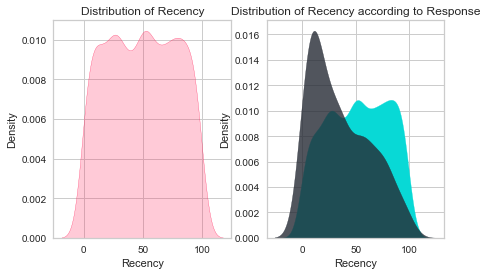

In [38]:
fig,ax = plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Distribution of Recency")
sns.kdeplot(df.Recency,ax=ax[0],color=color[1],shade=True)

ax[1].set_title("Distribution of Recency according to Response")
sns.kdeplot(df[df.Response==0]['Recency'],ax=ax[1],color = color[3],legend=True,shade=True,alpha=1)
sns.kdeplot(df[df.Response==1]['Recency'],ax=ax[1],color = color[2],shade=True,legend=True,alpha=0.8)

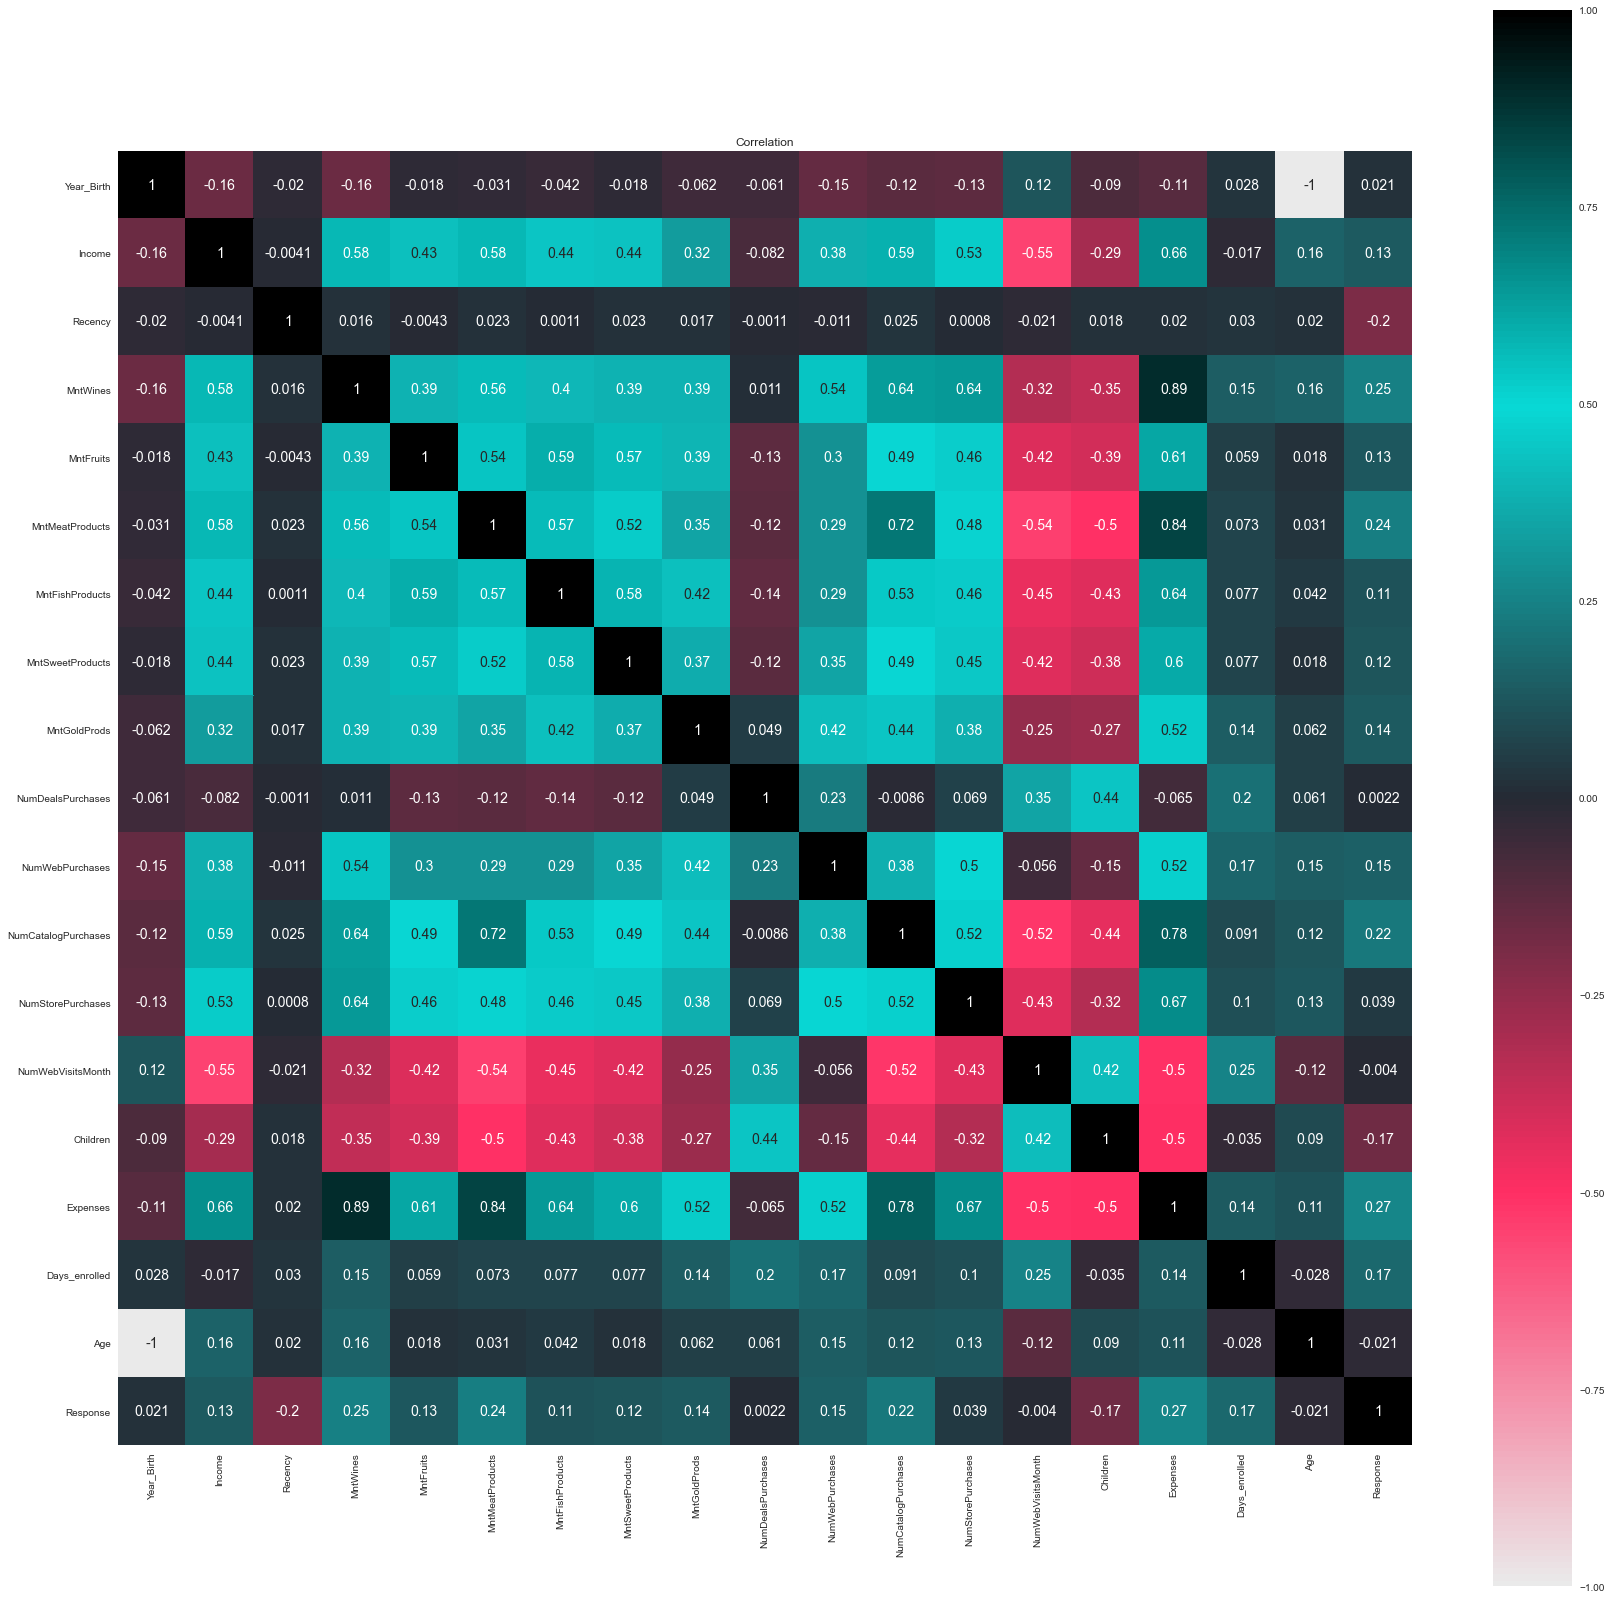

In [39]:
corr = df.corr()
plt.figure(figsize=(29,29))
sns.heatmap(corr, annot=True,square=True,cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",color) , annot_kws={'size': 14})
plt.title("Correlation")
plt.show()

No highly correlated features which coulbe be dropped

In [40]:
categorical_columns = ['Education', 'Marital_Status']

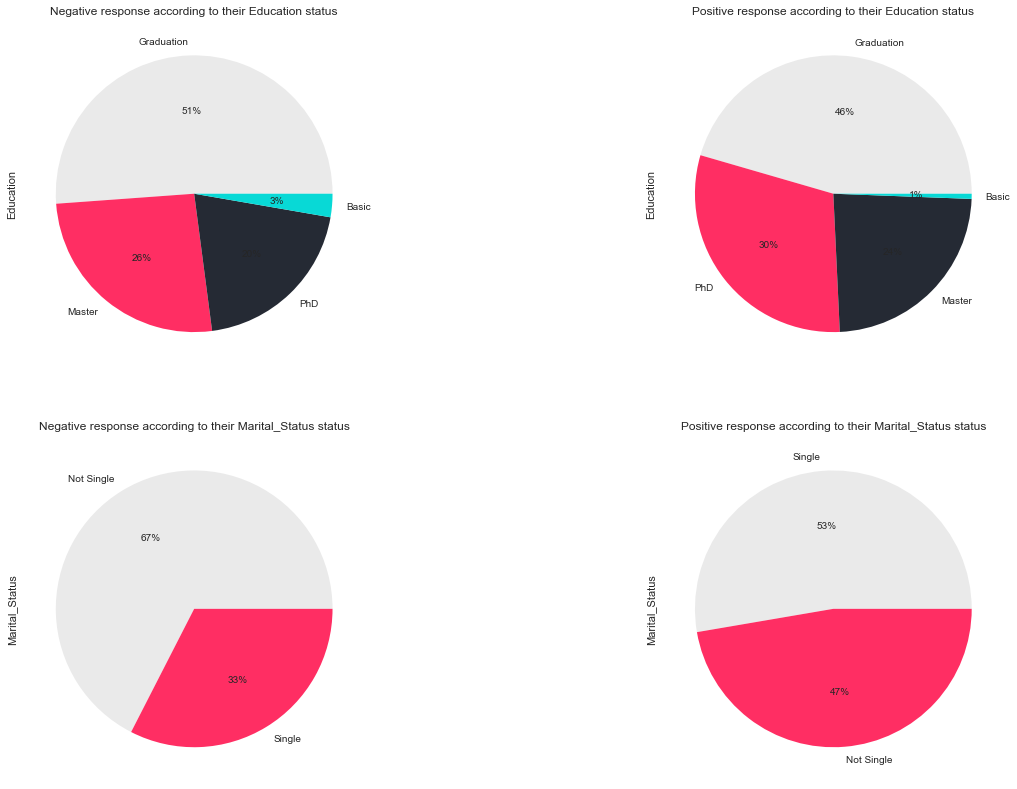

In [41]:
fig,axes = plt.subplots(2,2,figsize=(21,14))
pos = df[df.Response == 1]
neg = df[df.Response == 0]
for i in range(2):
    neg[categorical_columns[i]].value_counts().plot(kind='pie',colors = color ,ax=axes[i][0], fontsize=10, autopct='%1.0f%%',title=f"Negative response according to their {categorical_columns[i]} status")
for i in range(2):        
    pos[categorical_columns[i]].value_counts().plot(kind='pie',colors = color ,ax=axes[i][1], fontsize=10, autopct='%1.0f%%',title=f"Positive response according to their {categorical_columns[i]} status")
        
fig.show()


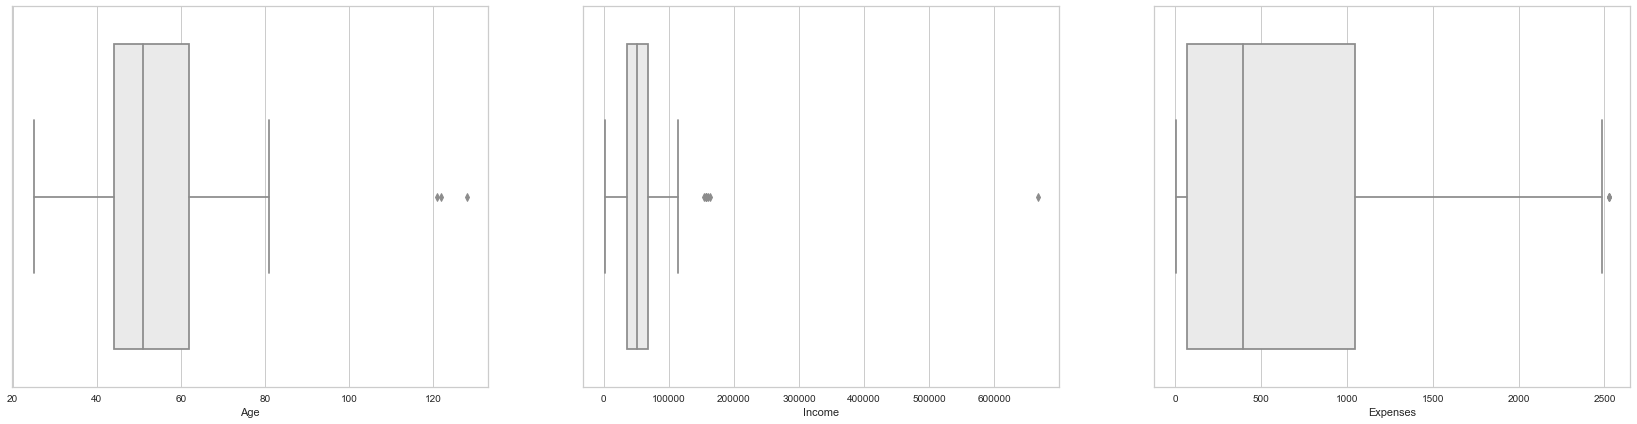

In [42]:
col = ['Age','Income','Expenses']
fig,axes = plt.subplots(1,3,figsize=(29,7))
for i in range(3):
    sns.boxplot(df[col[i]] ,ax=axes[i],palette=palette)

We can see some **outliers** in the Age and Income features

#### Dealing with outliers

In [43]:
from scipy import stats

In [44]:
df = df[np.abs(stats.zscore(df['Income'])) < 3]

In [45]:
df = df[np.abs(stats.zscore(df['Age'])) < 3]

In [46]:
df

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Expenses,Days_enrolled,Age,Response
0,1957,Graduation,Single,58138.0,58,635,88,546,172,88,...,3,8,10,4,7,0,1617,3496,64,1
1,1954,Graduation,Single,46344.0,38,11,1,6,2,1,...,2,1,1,2,5,2,27,2650,67,0
2,1965,Graduation,Not Single,71613.0,26,426,49,127,111,21,...,1,8,2,10,4,0,776,2997,56,0
3,1984,Graduation,Not Single,26646.0,26,11,4,20,10,3,...,2,2,0,4,6,1,53,2590,37,0
4,1981,PhD,Not Single,58293.0,94,173,43,118,46,27,...,5,5,3,6,5,1,422,2846,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Not Single,61223.0,46,709,43,182,42,118,...,2,9,3,4,5,1,1341,3066,54,0
2236,1946,PhD,Not Single,64014.0,56,406,0,30,0,0,...,7,8,2,5,7,3,444,2586,75,0
2237,1981,Graduation,Single,56981.0,91,908,48,217,32,12,...,1,2,3,13,6,0,1241,2840,40,0
2238,1956,Master,Not Single,69245.0,8,428,30,214,80,30,...,2,6,5,10,3,1,843,2841,65,0


#### Standardization
- By standarizing the continous variables we make them all equally important to the analysis. This is credical because if there are large differences between the range of the numerical variables, those variable with higher range of values will dominate over those with smaller ranges.

- Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance).
$$Z = \frac{X - \mu}{\sigma}$$

In [47]:
Y = df.Response.values
df.drop('Response',axis=1,inplace=True)

In [48]:
#Scaling
scaler = StandardScaler()
scaled_df = df.copy()
for i in df.select_dtypes(exclude='object').columns:
    scaled_df.loc[:, i] = StandardScaler().fit_transform(np.array(df[[i]]))
print("All features are now scaled")

All features are now scaled


In [49]:
feature_to_encode = ['Marital_Status','Education']
le = LabelEncoder()
for i in feature_to_encode:
    scaled_df[i]=scaled_df[[i]].apply(le.fit_transform)

print("All features are now numerical")

All features are now numerical


In [50]:
scaled_df.drop('Year_Birth',axis=1,inplace=True)

In [51]:
scaled_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Children,Expenses,Days_enrolled,Age
0,1,1,0.316484,0.307314,0.980166,1.550778,1.736151,2.456789,1.472029,0.842690,0.358938,1.405471,2.633984,-0.559160,0.689920,-1.266277,1.683247,1.976013,1.015715
1,1,1,-0.256135,-0.383771,-0.873191,-0.637618,-0.726371,-0.651738,-0.632996,-0.731824,-0.168815,-1.117198,-0.585437,-1.176175,-0.138430,1.393978,-0.962795,-1.666837,1.272020
2,1,0,0.970719,-0.798422,0.359410,0.569773,-0.174584,1.341376,-0.149082,-0.040574,-0.696567,1.405471,-0.227723,1.291882,-0.552605,-1.266277,0.283674,-0.172666,0.332234
3,1,0,-1.212506,-0.798422,-0.873191,-0.562156,-0.662528,-0.505455,-0.584604,-0.751025,-0.168815,-0.756817,-0.943150,-0.559160,0.275745,0.063851,-0.919526,-1.925195,-1.291031
4,3,0,0.324010,1.551268,-0.392031,0.418849,-0.215626,0.152822,-0.003908,-0.559011,1.414444,0.324327,0.129990,0.057854,-0.138430,0.063851,-0.305445,-0.822867,-1.034726


In [52]:
X = scaled_df

In [53]:
predictors = scaled_df.columns

In [54]:
trainX,testX,trainY,testY = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)


In [55]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf.fit(trainX,trainY)

RandomForestClassifier(n_jobs=4, verbose=False)

<AxesSubplot:>

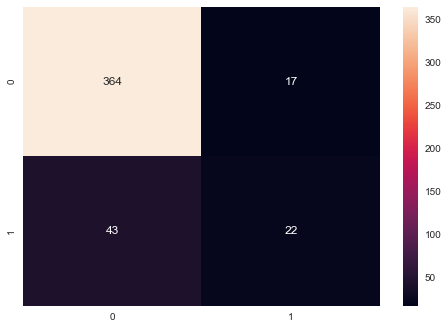

In [56]:
y_pred = clf.predict(testX)
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f')

In [57]:
roc_auc_score(testY, y_pred)


0.6469210579446801

In [58]:
print(classification_report(testY,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       381
           1       0.56      0.34      0.42        65

    accuracy                           0.87       446
   macro avg       0.73      0.65      0.67       446
weighted avg       0.85      0.87      0.85       446



In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smt = SMOTE(random_state=42)
# adasyn = ADASYN(random_state=42)
X_smote,Y_smote = smt.fit_resample(trainX,trainY)

In [61]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf.fit(X_smote,Y_smote)

RandomForestClassifier(n_jobs=4, verbose=False)

Text(0.5, 1.0, 'Feature Importance')

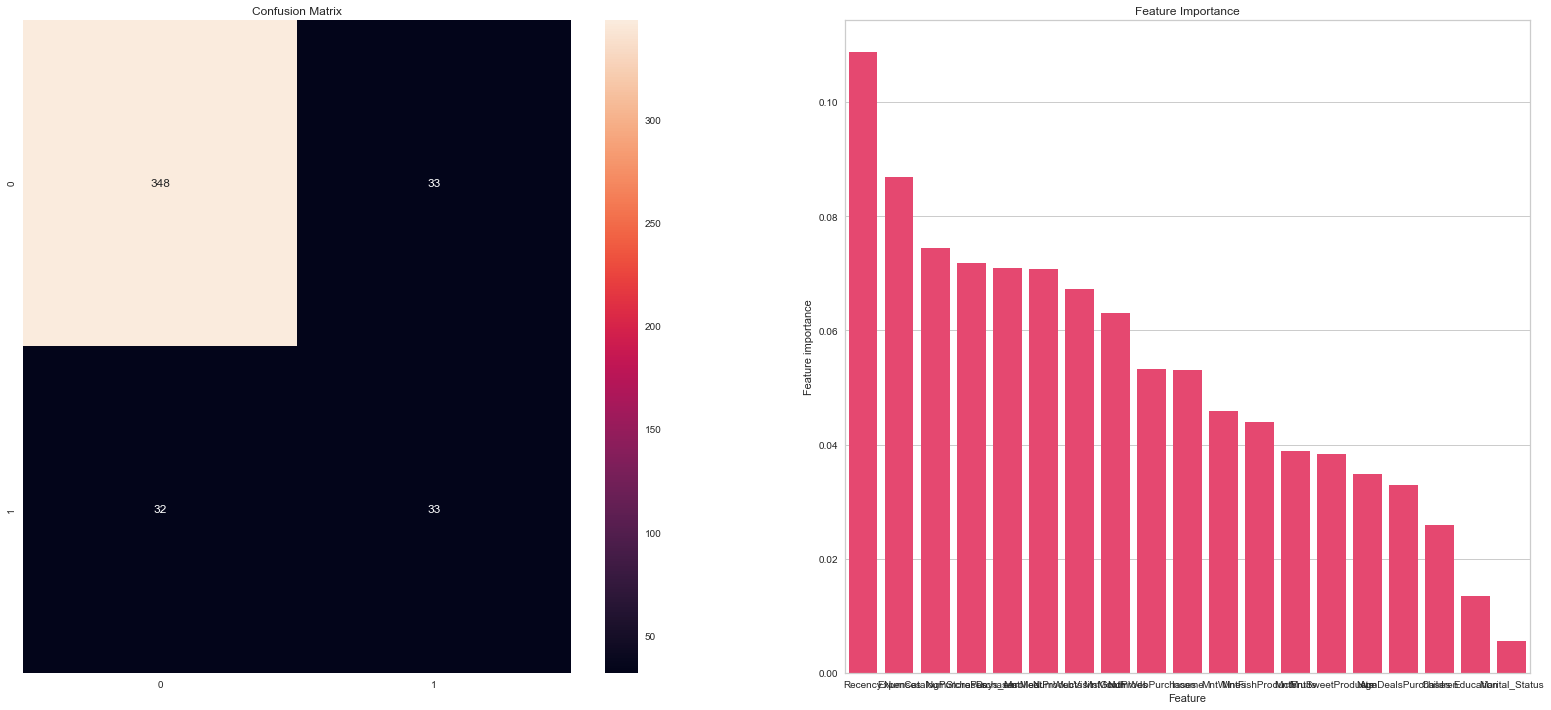

In [62]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=4,verbose=False)
clf.fit(X_smote,Y_smote)
RandomForestClassifier(n_jobs=4, verbose=False)
fig, axes = plt.subplots(1,2,figsize=(27,12))
y_pred = clf.predict(testX)
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=color[1],ax=axes[1])
axes[1].set_title("Feature Importance")
# s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [63]:
roc_auc_score(testY, y_pred)


0.7105390672319806

In [64]:
print(classification_report(testY,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       381
           1       0.50      0.51      0.50        65

    accuracy                           0.85       446
   macro avg       0.71      0.71      0.71       446
weighted avg       0.86      0.85      0.85       446



In [65]:
model = AdaBoostClassifier(random_state=42,
                        algorithm='SAMME.R',
                         learning_rate=0.8,)

In [66]:
model.fit(X_smote,Y_smote)


AdaBoostClassifier(learning_rate=0.8, random_state=42)

Text(0.5, 1.0, 'Feature Importance')

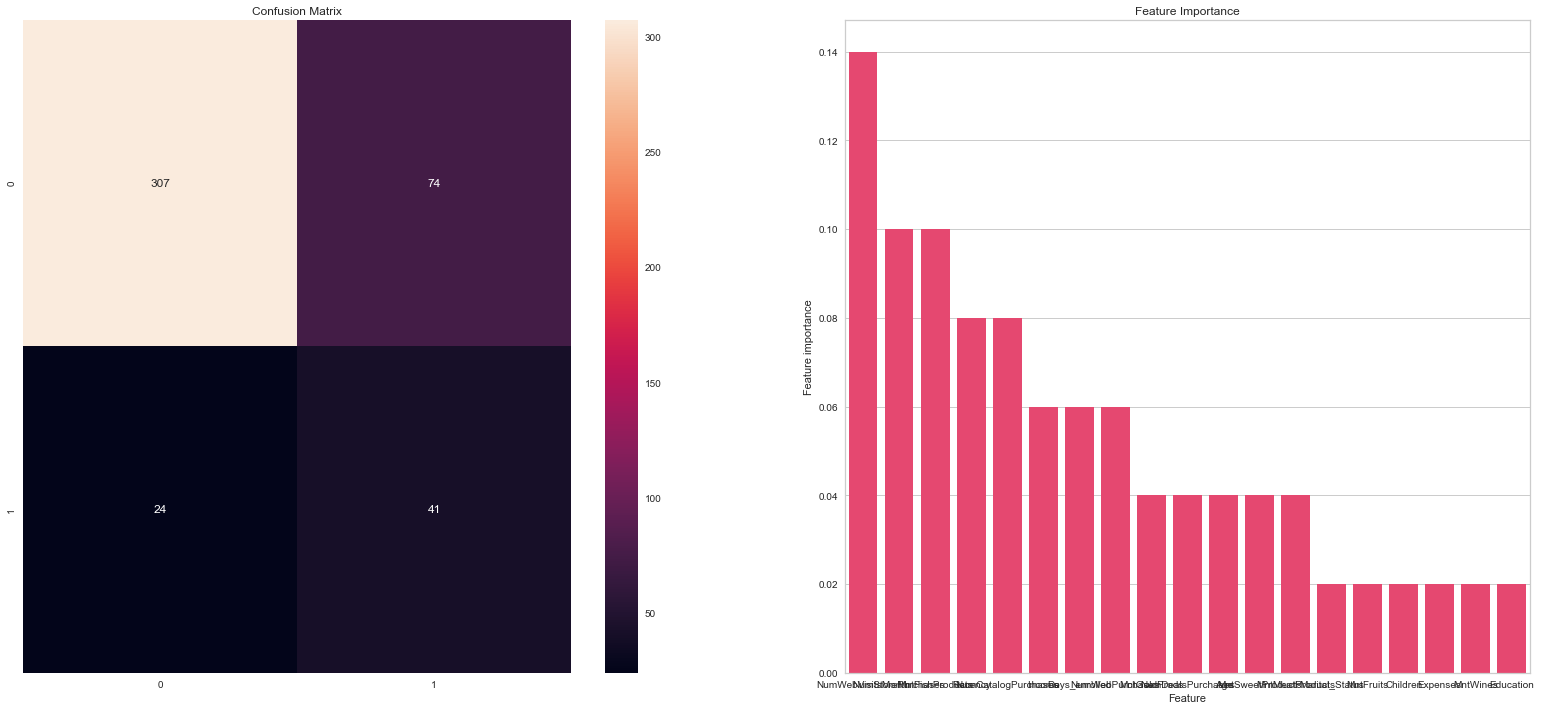

In [67]:
fig, axes = plt.subplots(1,2,figsize=(27,12))
y_pred = model.predict(testX)
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=color[1],ax=axes[1])
axes[1].set_title("Feature Importance")
# s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [68]:
print(classification_report(testY,y_pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.86       381
           1       0.36      0.63      0.46        65

    accuracy                           0.78       446
   macro avg       0.64      0.72      0.66       446
weighted avg       0.84      0.78      0.80       446



In [69]:
roc_auc_score(testY,y_pred)


0.7182717544922269

In [70]:
model = lgb.LGBMClassifier(
    objective='binary',
        metric = 'auc',
          learning_rate= 0.05,
          num_leaves =  7,max_depth=4,min_child_samples= 100,  
          max_bin=100)

In [71]:
model.fit(X_smote,Y_smote)


LGBMClassifier(learning_rate=0.05, max_bin=100, max_depth=4, metric='auc',
               min_child_samples=100, num_leaves=7, objective='binary')

Text(0.5, 1.0, 'Feature Importance')

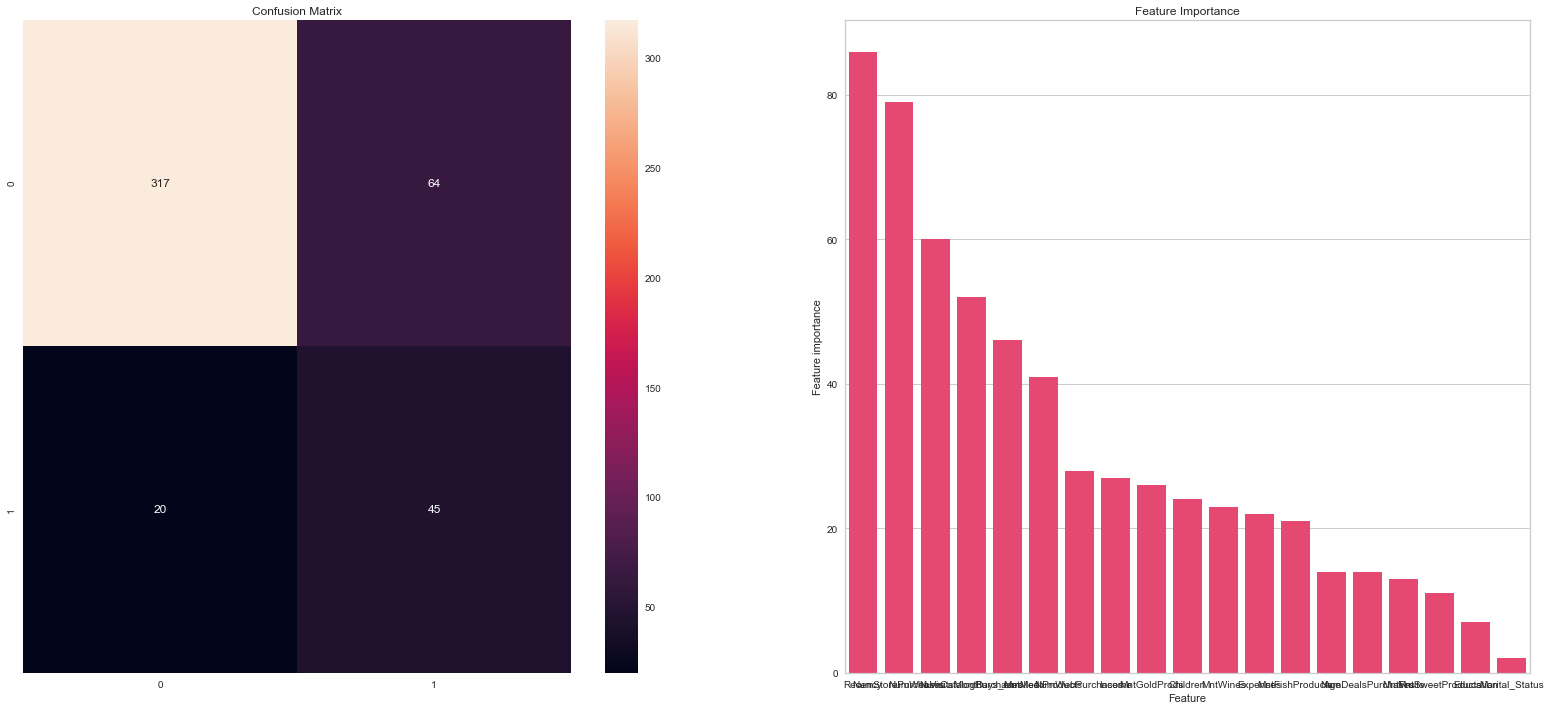

In [72]:
fig, axes = plt.subplots(1,2,figsize=(27,12))
y_pred = model.predict(testX)
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=color[1],ax=axes[1])
axes[1].set_title("Feature Importance")
# s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [73]:
print(classification_report(testY,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.83      0.88       381
           1       0.41      0.69      0.52        65

    accuracy                           0.81       446
   macro avg       0.68      0.76      0.70       446
weighted avg       0.86      0.81      0.83       446



In [74]:
print(roc_auc_score(testY,y_pred))


0.7621643448415101


In [75]:
model_xgb = xgb.XGBClassifier(silent=True,max_depth=2,eval_metric='auc')


In [76]:
model_xgb.fit(X_smote,Y_smote)


[08:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Text(0.5, 1.0, 'Feature Importance')

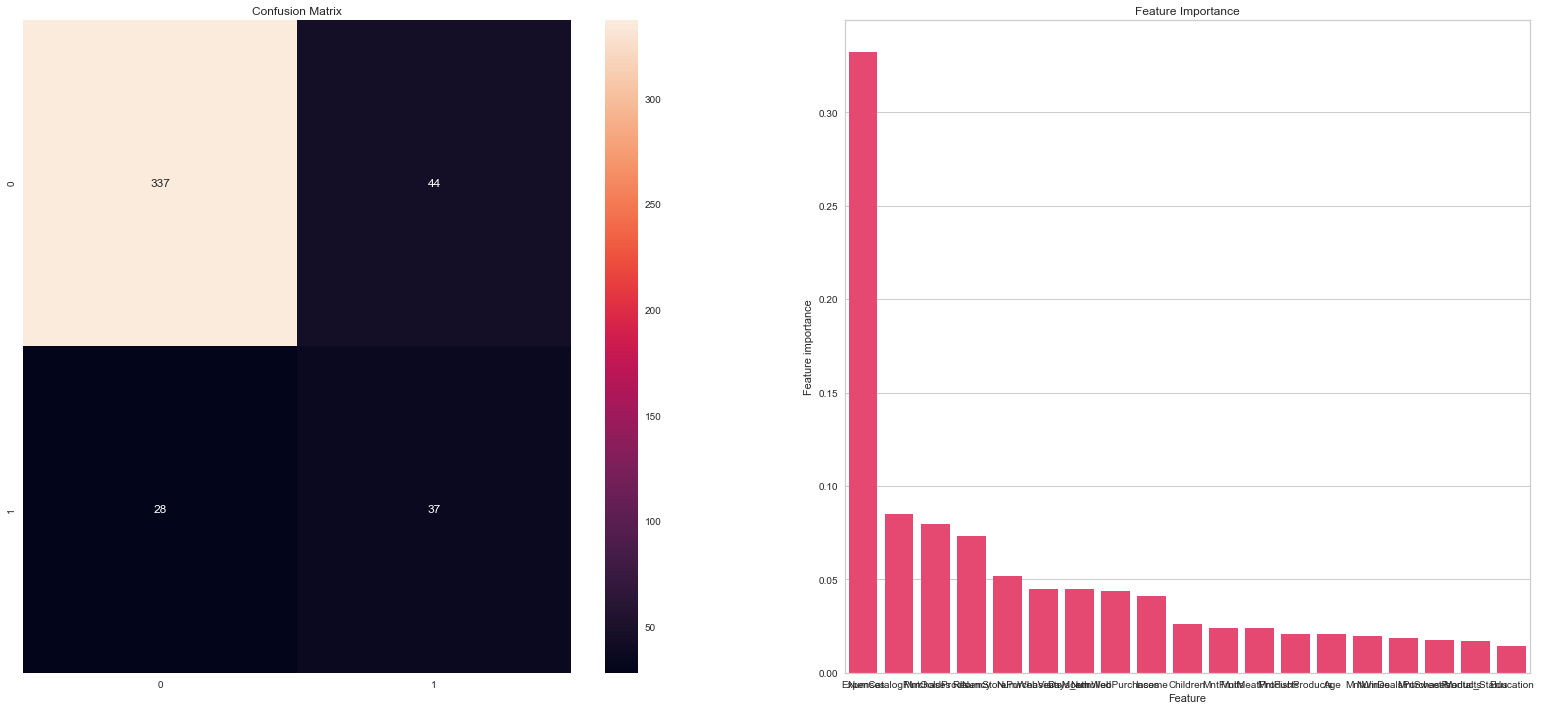

In [77]:
fig, axes = plt.subplots(1,2,figsize=(27,12))
y_pred = model_xgb.predict(testX)
axes[0].set_title("Confusion Matrix")
sns.heatmap(confusion_matrix(testY,y_pred),annot=True,fmt='0.0f',ax=axes[0])

tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model_xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color=color[1],ax=axes[1])
axes[1].set_title("Feature Importance")
# s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [78]:
print(classification_report(testY,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       381
           1       0.46      0.57      0.51        65

    accuracy                           0.84       446
   macro avg       0.69      0.73      0.71       446
weighted avg       0.86      0.84      0.85       446



In [79]:
print(roc_auc_score(testY, y_pred))


0.7268726024631537


### Feature Selection

In [80]:
slm = SelectFromModel(model_xgb,threshold=0.02)
X_train_xgb = slm.fit_transform(X_smote,Y_smote)

[08:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [81]:
# Because we need to select the same features as train dataset
test_xgb = np.array(testX[testX.columns[slm.get_support()]])

In [82]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(pd.DataFrame(X_train_xgb),Y_smote )
dtest = xgb.DMatrix(pd.DataFrame(test_xgb), testY)

#What to monitor (in this case, **train** and **test**)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [83]:
params = {}
params['objective'] = 'binary:logistic'
params['silent'] = True
params['max_depth'] = 2
params['eval_metric'] = 'auc'
params['random_state'] = 42

In [84]:
model = xgb.train(params,dtrain,150,watchlist)


[08:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.74910	test-auc:0.68288
[1]	train-auc:0.83259	test-auc:0.77381
[2]	train-auc:0.84733	test-auc:0.79427
[3]	train-auc:0.86149	test-auc:0.81151
[4]	train-auc:0.87435	test-auc:0.81633
[5]	train-auc:0.88536	test-auc:0.82425
[6]	train-auc:0.90276	test-auc:0.83691
[7]	train-auc:0.90271	test-auc:0.83814
[8]	train-auc:0.90904	test-auc:0.84387
[9]	train-auc:0.91175	test-auc:0.84549
[10]	train-auc:0.91687	test-auc:0.84464
[11]	train-auc:0.92242	test-auc:0.84371
[12]	train-auc:0.92413	test-auc:0.84415
[13]	train-auc:0.92732	test-auc:0.85393
[14]	train-auc:0.93195	test-auc:0.84981
[15]	train-auc:0.93435	t

In [85]:
y_pred = model.predict(dtest)


In [86]:
roc_auc_score(testY,y_pred)


0.8663638199071271

In [88]:
# load JS visualization code to notebook
shap.initjs()

In [90]:
# Using a random sample of the dataframe for better time computation
X_sampled = trainX.sample(100, random_state=10)

In [94]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_sampled)

In [95]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

In [97]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, trainX)

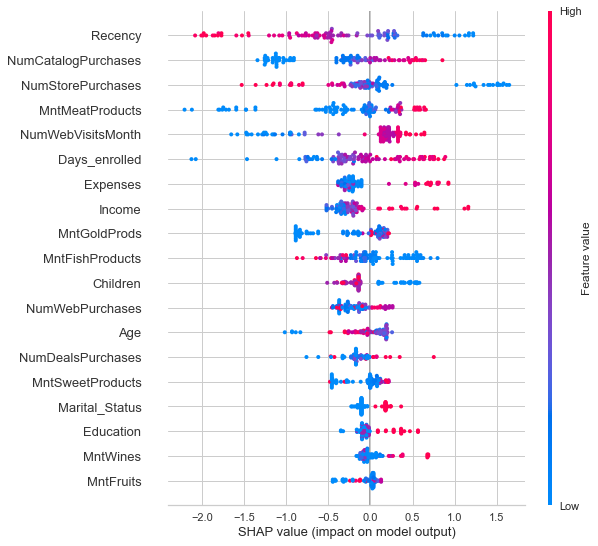

In [98]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled)

## Conclusion

- Catalog Purchasing customers are positively affected by this promotion. So we should focus on this demographic of customers \
and give more offers to these customers. 
- Store purchasers are negatively affected by this promotion.
- People who are recent are negatively affected by this promotion.
- People who are customer for longer period of time  are positively affected by this promotion.So offering loyalty benefits to \ such customers would be beneficial for business.
